## Time Series Analysis and Forecasting with Prophet
#### Goal: Use Prophet to predict the number of passengers in the next 36 months

In [1]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizualizations
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

In [2]:
# importing data
df = pd.read_csv("/Users/racheldyap/Desktop/BTS 1st Semester/DSF/Exercises/Session 16/AirPassengers.csv", low_memory = False)

# reverse to the order:
df = df.sort_index(ascending = False)

# to datetime64
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [3]:
df.head().append(df.tail())

,Month,#Passengers
143,1960-12-01,432
142,1960-11-01,390
141,1960-10-01,461
140,1960-09-01,508
139,1960-08-01,606
4,1949-05-01,121
3,1949-04-01,129
2,1949-03-01,132
1,1949-02-01,118
0,1949-01-01,112


In [4]:
# from the prophet documentation every variables should have specific names
# using prophet, always rename your timeseries as 'ds' and the variable you are trying to predict as 'y'
df = df.rename(columns = {'Month': 'ds','#Passengers': 'y'})
df.head()

,ds,y
143,1960-12-01,432
142,1960-11-01,390
141,1960-10-01,461
140,1960-09-01,508
139,1960-08-01,606


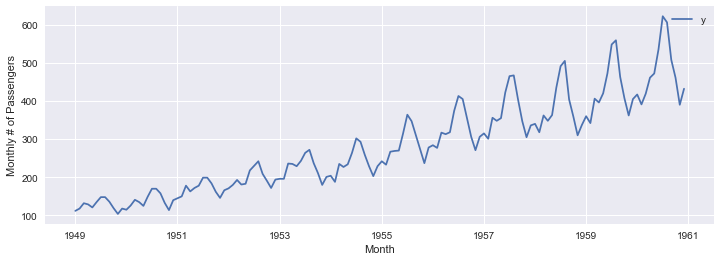

In [5]:
# plot daily sales
ax = df.set_index('ds').plot(figsize = (12,4))
ax.set_ylabel('Monthly # of Passengers')
ax.set_xlabel('Month')
plt.show()

### Modeling Holidays

In [6]:
# recognizes holidays

In [7]:
# create holidays dataframe
#airline = pd.DataFrame({'holiday':''})

In [8]:

#state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
#school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

#state = pd.DataFrame({'holiday': 'state_holiday',
                      #'ds': pd.to_datetime(state_dates)})
#school = pd.DataFrame({'holiday': 'school_holiday',
    #'ds': pd.to_datetime(school_dates)}) #create index as date

#holidays = pd.concat((state, school))      
#holidays.head()

#### Forecast 36 months of passengers

In [9]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, weekly_seasonality= True)
my_model.fit(df)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 156*7) #period 6weeks by 7 days per week so 6*7

print("First week to forecast.")
future_dates.tail(7)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


First week to forecast.


,ds
1229,1963-11-22
1230,1963-11-23
1231,1963-11-24
1232,1963-11-25
1233,1963-11-26
1234,1963-11-27
1235,1963-11-28


In [10]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1229,1963-11-22,570.628363,530.614281,613.028317
1230,1963-11-23,569.656605,524.254924,612.109896
1231,1963-11-24,568.918588,521.093888,613.265855
1232,1963-11-25,569.705844,526.105375,616.213310
1233,1963-11-26,568.688292,523.979756,611.026797
1234,1963-11-27,573.463474,528.634693,617.667306
1235,1963-11-28,572.065633,527.221433,616.917968


In [11]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

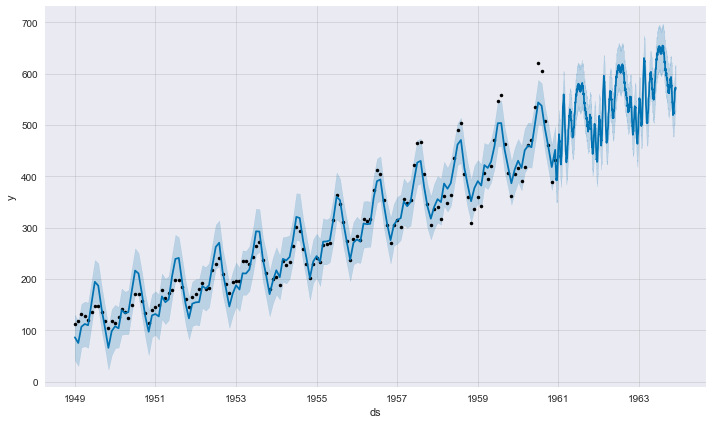

In [12]:
# visualizing predictions
my_model.plot(forecast);

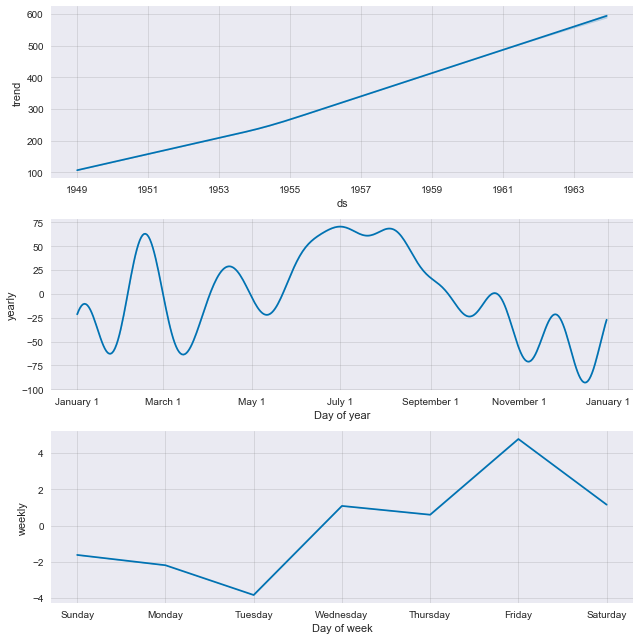

In [13]:
my_model.plot_components(forecast);